<a href="https://colab.research.google.com/github/NguyenThiTrucMai/MayHoc/blob/main/Lab_7_20130321_NguyenThiTrucMai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [4]:

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from prettytable import PrettyTable


from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA


from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_classif


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# importing libraries
from sklearn.cluster import KMeans
from sklearn import datasets


# code
from sklearn.cluster import KMeans
from sklearn import datasets

from scipy.stats import mode
from sklearn.metrics import accuracy_score


# code
from sklearn.cluster import KMeans
from sklearn import datasets
from scipy.stats import mode
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

from sklearn.metrics.cluster import silhouette_score
from plotnine import ggplot, aes, geom_line,geom_point

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [6]:
# code
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd '/content/gdrive/MyDrive/MayHoc/Lab7'

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [7]:
#code
# loading dataset
dataset = datasets.load_iris()
X= dataset['data']
y= dataset['target']



In [8]:
clf = svm.SVC(kernel='sigmoid', random_state=0)
scores_accuracy= cross_validate(clf,X,y,scoring='accuracy',cv=10)
scores_recall_macro = cross_validate(clf, X, y, scoring ="recall_macro", cv = 10 )
scores_f1_macro = cross_validate(clf, X, y, scoring ="f1_macro", cv = 10 )

print(sorted(scores_accuracy.keys()))
print("accuracy",np.mean(scores_accuracy['test_score']))


print(sorted(scores_recall_macro.keys()))
print("recall",np.mean(scores_recall_macro['test_score']))

print(sorted(scores_f1_macro.keys()))
print("f1",np.mean(scores_f1_macro['test_score']))

['fit_time', 'score_time', 'test_score']
accuracy 0.06666666666666668
['fit_time', 'score_time', 'test_score']
recall 0.06666666666666667
['fit_time', 'score_time', 'test_score']
f1 0.041984126984126985


In [9]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel="rbf", random_state=0)
scores_accuracy =cross_val_score(model, X, y, scoring ="accuracy", cv = 10 )

print("scores.mean(): ", scores_accuracy.mean())

scores.mean():  0.9733333333333334


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [10]:

X_new = SelectKBest(chi2, k=2).fit_transform(X,y)

clf=RandomForestClassifier(n_estimators=100)
scores= cross_validate(clf,X,y,scoring='accuracy',cv=10)
print(sorted(scores.keys()))
print("fit_time", np.mean(scores['fit_time']))
print("score_time", np.mean(scores['score_time']))
print("test_score", np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
fit_time 0.47461063861846925
score_time 0.024187326431274414
test_score 0.9666666666666666


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [11]:


# loading dataset
mnist = datasets.load_digits()
# building model
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
kmeans.cluster_centers_.shape



labels = np.zeros_like(clusters)
for i in range(3): #3: số lớp trong tập dữ liệu
  mask = (clusters == i)
  # print(mask)
  labels[mask] = mode(mnist.target[mask])[0]
  # print(labels[mask])

print("accuracy: ",accuracy_score(mnist.target, labels))
print("precision: ",precision_score(mnist.target, labels,average="macro"))
print("recall: ",recall_score(mnist.target, labels,average="macro"))
print("f1: ",f1_score(mnist.target, labels,average="macro"))



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


accuracy:  0.35058430717863104
precision:  0.29052077194767334
recall:  0.34837173105573116
f1:  0.2857716726929039


<ipython-input-11-4991e3a8885b>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [12]:
# code
#Random forest
clf=RandomForestClassifier(n_estimators=100)

accuracy_rf_1 = cross_validate(clf,X,y,scoring='accuracy',cv=10)
precision_rf_1 = cross_validate(clf,X,y,scoring='precision_macro',cv=10)
recall_rf_1 = cross_validate(clf,X,y,scoring='recall_macro',cv=10)
f1_rf_1 = cross_validate(clf,X,y,scoring='f1_macro',cv=10)

#NaiveBayes 
clf = GaussianNB()
accuracy_bayes_1 =  cross_validate(clf,X,y,scoring='accuracy',cv=10)
precision_bayes_1 =  cross_validate(clf,X,y,scoring='precision_macro',cv=10)
recall_bayes_1 = cross_validate(clf,X,y,scoring='recall_macro',cv=10)
f1_bayes_1 = cross_validate(clf,X,y,scoring='f1_macro',cv=10)

# kNN
knn = KNeighborsClassifier(n_neighbors=5)

accuracy_knn = cross_validate(clf,X,y,scoring='accuracy',cv=10)
precision_knn = cross_validate(clf,X,y,scoring='precision_macro',cv=10)
recall_knn = cross_validate(clf,X,y,scoring='recall_macro',cv=10)
f1_knn = cross_validate(clf,X,y,scoring='f1_macro',cv=10)

In [13]:

data={'accuracy':[np.mean(accuracy_rf_1['test_score']),np.mean(accuracy_bayes_1['test_score']),np.mean(accuracy_knn['test_score'])],
      'precision':[np.mean(precision_rf_1['test_score']),np.mean(precision_bayes_1['test_score']),np.mean(precision_knn['test_score'])],
      'recall':[np.mean(recall_rf_1['test_score']),np.mean(recall_bayes_1['test_score']),np.mean(recall_knn['test_score'])],
      'f1':[np.mean(f1_rf_1['test_score']),np.mean(f1_bayes_1['test_score']),np.mean(f1_knn['test_score'])]}
row_labels = ['Random forest','NaiveBayes','kNN']

dframe = pd.DataFrame(data=data,index = row_labels)
dframe

,accuracy,precision,recall,f1
Random forest,0.960000,0.966667,0.966667,0.966330
NaiveBayes,0.953333,0.962698,0.953333,0.952441
kNN,0.953333,0.962698,0.953333,0.952441


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [14]:
#code

print("Có giám sát tốt hơn không có giám sát")

Có giám sát tốt hơn không có giám sát


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

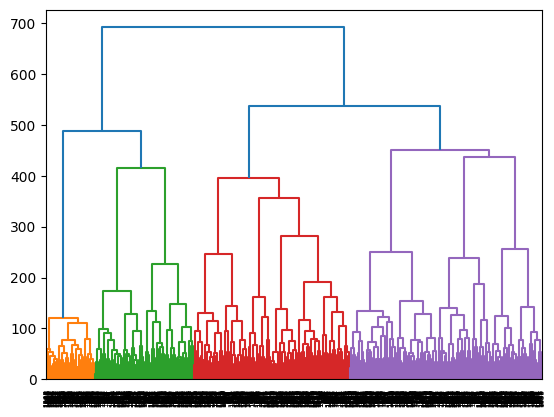

In [15]:
# cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
# cluster.fit_predict(dataset.data)
# # get clustering labels
# cluster.labels_

dend = shc.dendrogram(shc.linkage(mnist.data, method='ward'))


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [16]:
#code

from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MayHoc'

Mounted at /content/gdrive
/content/gdrive/MyDrive/MayHoc


In [17]:
datas = pd.read_csv('shopping-data.csv')
datas.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


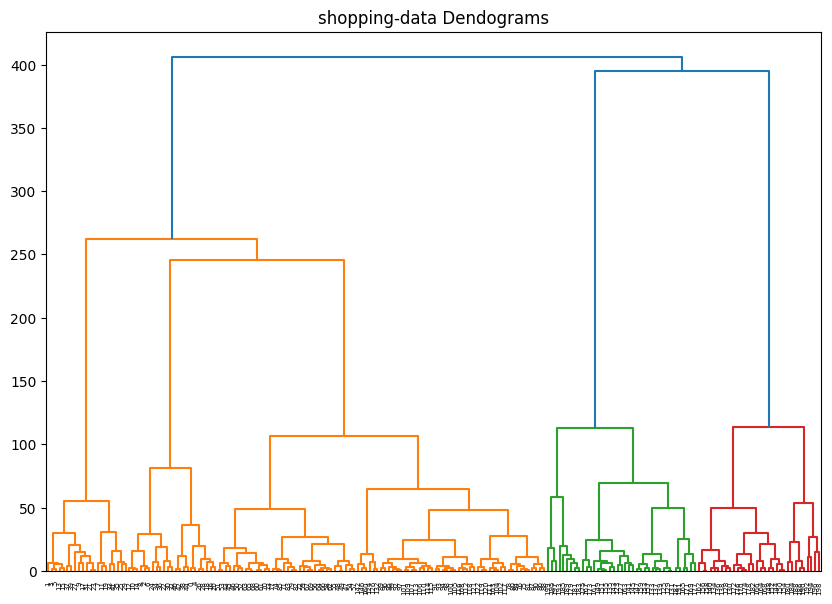

In [18]:
plt.figure(figsize=(10, 7)) 
plt.title("shopping-data Dendograms")
dend = shc.dendrogram(shc.linkage(datas.iloc[:, 3:5].values, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

Text(0, 0.5, 'SSE')

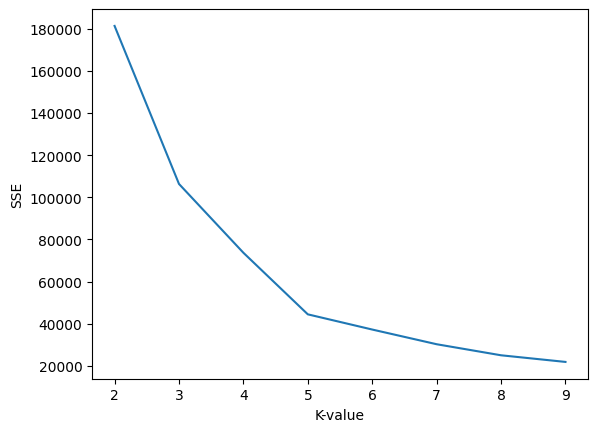

In [19]:
#code

sse = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state = 42)
  kmeans.fit(datas.iloc[:, 3:5].values)
  sse.append(kmeans.inertia_)

plt.plot(range(2,10), sse)
plt.xlabel('K-value')
plt.ylabel('SSE')

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [20]:
#code

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
# get clustering labels
cluster.labels_



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#Finally,
Save a copy in your Github. Remember renaming the notebook.